> ## **Métodos Computacionales II - Taller #1**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

In [3]:
# Zona de librerías:

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd

> **Sección 2.9:**

**1.** Muestre que los siguientes operadores diferenciales:

$$f'(x) = \frac{-f(x + 2h) + 4f(x + h) - 3f(x)}{2h}$$

$$f''(x) = \frac{f(x + h) - 2f(x) + f(x - h)}{h^{2}}$$

son consistentes. Use como funciones de prueba $f(x) = x^{2}$ y $f(x) = sin(x)$.

**2.** Usando el código de la clase, genere 10 esferas localizadas aleatoriamente en la mesa A = 40 × 40 con velocidad aleatorias entre $−5$ m/s y $5$ m/s. Simule $10$ s con un paso de integración de $h = 0.001$ s y reduzca la simulación en un factor de 200; quitando la interacción con la pared. Conteste las siguientes preguntas exponiendo los conceptos físicos involucrados.

In [45]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        # Atributos instantaneos:
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        self.f = self.m*self.a
        
        # Historial:
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        self.P = np.zeros_like(self.R)
    
        # Física:
        
        self.K = 20.
        self.VEk = np.zeros(len(t))
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Algoritmo de Euler:
        
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            Fn = self.K * compresion**3
            self.n = (self.r - p.r)/d
            self.f = Fn*self.n            
        
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        self.V[i] = self.v
        self.P[i] = self.m*self.v
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]

In [53]:
def GetParticles(N,t):
    
    Particles = []

    for i in range(N):
        r0 = np.array([float(rnd.randrange(-15,15)), float(rnd.randrange(-15,15))])
        v0 = np.array([float(rnd.randrange(-5,5)), float(rnd.randrange(-5,5))])
        a0 = np.array([0.,0.])
        Particles.append(Particle(r0,v0,a0,t))
    
    return Particles

In [54]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetParticles(10,t)

In [55]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Trust me. Let me cook', unit=' Steps'):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j]) 
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            
            
    return Particles

In [56]:
Particles = RunSimulation(t,Particles)

Trust me. Let me cook: 100%|███████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1840.44 Steps/s]


In [57]:
scale = 200
t_ = t[::scale]

<IPython.core.display.Javascript object>


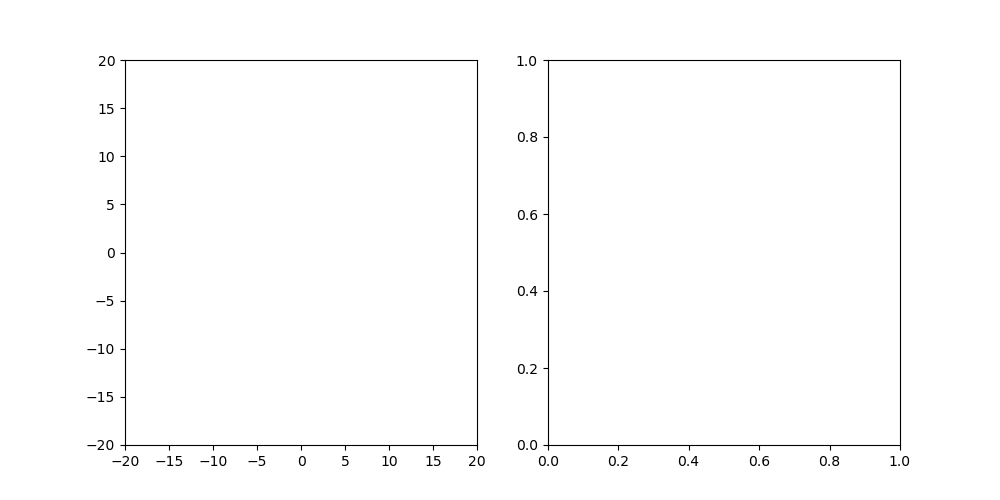

In [68]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r'$t$ =  %.3f' %(t_[i]))
    
    for p in Particles:
        
        x = p.GetPosition(scale=100)[i,0]
        y = p.GetPosition(scale=100)[i,1]
        
        vx = p.GetVelocity(scale=100)[i,0]
        vy = p.GetVelocity(scale=100)[i,1]
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5) # Se ve más bonito con la flecha dentro del círculo. :3
        circle = plt.Circle( (x,y), p.radius, color='r', fill= True)
        ax.add_patch(circle)
        
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)


**7).** Considere la ecuación diferencial $$ \frac{\text{d}u}{\text{d}t} = \alpha u ,\, u(0)=u_0.$$ 

Muestre que aplicando iterativamente se obtiene:

$$u_k = (1+\alpha \Delta t)^k u_0$$ 

Para el caso en que $\alpha < 0$. Muestre que la solución numérica oscilará si $\Delta t > -\frac{1}{\alpha}$.

> **Solución:**

Teniendo en cuenta el método de Euler, se sabe que 

$$u_{i+1} = u_{i} + \Delta t (\alpha u_{i})$$

Se puede reescribir como 

$$u_{k} = (1 + \alpha \Delta t) \cdot u_{k-1}.$$ 

Sin embargo, se tiene, por la segunda igualdad que 

$$u_{k} = (1 + \alpha\Delta t)^2 \cdot u_{k-2}$$ 

Usando estos pasos de manera iterada $k-1$ veces, se obtiene que 

$$u_k = (1 + \alpha\Delta t)^k \cdot u_0.$$

Por otro lado, usando el hecho de que $\alpha < 0$. Se puede llegar a que 

$$ \alpha \Delta t < -1 $$ 

Sumando uno a ambos lados 

$$ 1 + \alpha t < 0 $$ 

Esto significa que la expresión $(1 + \alpha \Delta t)^k$ será positiva o negativa dependiendo de si $k$ es par o impar, respectivamente.

---

Ajuste $\alpha = -1$ y muestre las soluciones oscilatorias para $\Delta t = 1.1, 1.5 \text{ y } 1.9 \text{ s}$. Por otro lado, la solución exacta nunca oscila $u(t) = e^{\alpha t}$.

> **Solución:**

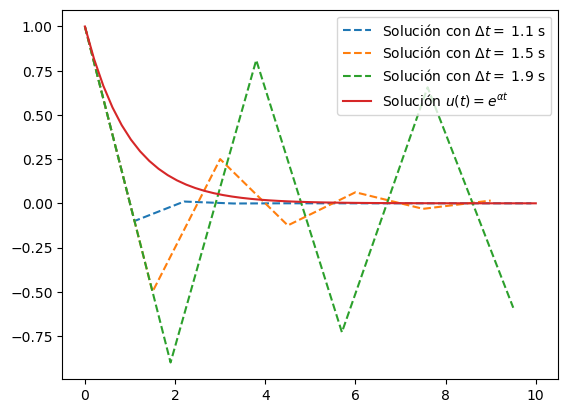

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dt = [1.1,1.5,1.9]
N = 100
alpha = -1
u = [np.zeros(N),np.zeros(N),np.zeros(N)]

ax = plt.subplot(1,1,1)



for j in range(len(dt)):
    for i in range(N-1):
        if i == 0:
            u[j][i] = 1
        u[j][i+1] = (1 + alpha*dt[j])*u[j][i]
    t = np.arange(0,10,dt[j])
    ax.plot(t,u[j][:len(t)],label=r"Solución con $\Delta t =$ %s s"%(dt[j]),linestyle="dashed")
tlins = np.linspace(0,10)
ax.plot(tlins,np.exp(alpha*tlins),label=r"Solución $u(t) = e^{\alpha t}$")

plt.legend()